<a href="https://colab.research.google.com/github/Y025/Sharing/blob/main/Niaga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIMB NIAGA DATA SCIENCE PROJECT : LOAN INTEREST RATE PREDICTION

## Importing Packages

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Niaga/Train.csv")
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [6]:
df.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [7]:
df.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

## Analyze Each Available Parameter

### Loan_Amount_Requsted

In [8]:
# Change Loan Amount Requested to Float
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].str.replace(',','')
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].astype('float')

### Length_Employed

In [9]:
df['Length_Employed'].value_counts(dropna=False)

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
NaN           7371
9 years       6285
Name: Length_Employed, dtype: int64

In [10]:
# Let's drop the nan values
df = df.dropna(subset=['Length_Employed'])
df['Length_Employed'].value_counts(dropna=False)

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

## Home Owner

In [11]:
df['Home_Owner'].value_counts(dropna=False)

Mortgage    67376
Rent        53863
NaN         24186
Own         11456
Other          48
None            9
Name: Home_Owner, dtype: int64

In [12]:
df['Home_Owner'] = df['Home_Owner'].fillna('Other')
df['Home_Owner'] = df['Home_Owner'].str.replace('None', 'Other')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Annual Income

In [13]:
df.describe()['Annual_Income']

count    1.329600e+05
mean     7.445043e+04
std      6.119566e+04
min      4.000000e+03
25%      4.573100e+04
50%      6.450000e+04
75%      9.000000e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

In [14]:
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].mean())

## Income_Verified

In [15]:
df['Income_Verified'].unique()

array(['not verified', 'VERIFIED - income', 'VERIFIED - income source'],
      dtype=object)

## Purpose_Of_Loan

In [16]:
df['Purpose_Of_Loan'].unique()

array(['car', 'debt_consolidation', 'credit_card', 'home_improvement',
       'major_purchase', 'other', 'medical', 'small_business', 'moving',
       'wedding', 'vacation', 'house', 'educational', 'renewable_energy'],
      dtype=object)

## Debt_To_Income

In [17]:
df.describe()['Debt_To_Income']

count    156938.000000
mean         17.153182
std           7.818800
min           0.000000
25%          11.330000
50%          16.790000
75%          22.700000
max          39.990000
Name: Debt_To_Income, dtype: float64

## Inquiries_Last_6Mo

In [18]:
df.describe()['Inquiries_Last_6Mo']

count    156938.000000
mean          0.784080
std           1.036964
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: Inquiries_Last_6Mo, dtype: float64

## Months_Since_Deliquency

In [19]:
df.describe()['Months_Since_Deliquency']

count    72521.000000
mean        34.112133
std         21.751627
min          0.000000
25%         16.000000
50%         31.000000
75%         49.000000
max        170.000000
Name: Months_Since_Deliquency, dtype: float64

In [20]:
# Bisa isi mean, isi 0, atau delete data

#Lihat dlu apakah hilangnya random atau tidak, ternyata secara random jika dibandingkan dengan interest rate
df[df['Months_Since_Deliquency'].isna()]['Interest_Rate'].value_counts()

2    35190
3    27920
1    21307
Name: Interest_Rate, dtype: int64

In [21]:
#Lihat apakah yang 0bulan telat bayarnya banyak atau ngga
df[df['Months_Since_Deliquency']==0]['Interest_Rate'].value_counts()

2    144
1     97
3     73
Name: Interest_Rate, dtype: int64

In [22]:
# Replace with mean
df['Months_Since_Deliquency'] = df['Months_Since_Deliquency'].fillna(df['Months_Since_Deliquency'].mean())

## Number_Open_Accounts

In [23]:
df.describe()['Number_Open_Accounts']

count    156938.000000
mean         11.248544
std           5.004098
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          76.000000
Name: Number_Open_Accounts, dtype: float64

In [24]:
q1 = np.quantile(df['Number_Open_Accounts'], 0.25)
q3 = np.quantile(df['Number_Open_Accounts'], 0.75)
iqr = q3 - q1
upper_boundary = q3 + 1.5*iqr
lower_boundary = q1 - 1.5*iqr
print(lower_boundary, upper_boundary)

-1.0 23.0


In [25]:
df[df['Number_Open_Accounts'] > upper_boundary].shape

(3658, 14)

## Total_Accounts

In [26]:
df.describe()['Total_Accounts']

count    156938.000000
mean         25.118365
std          11.586581
min           2.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: Total_Accounts, dtype: float64

## Gender

In [27]:
df['Gender'].value_counts()

Male      111932
Female     45006
Name: Gender, dtype: int64

## Interest_Rate

In [28]:
df['Interest_Rate'].value_counts()

2    67408
3    57133
1    32397
Name: Interest_Rate, dtype: int64

In [29]:
#final_check
df.isna().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

# EDA

## Loan_Amount_Requsted Vis

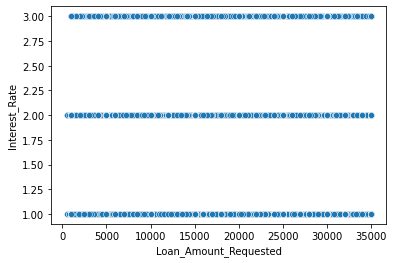

In [30]:
sns.scatterplot(x='Loan_Amount_Requested', y = 'Interest_Rate', data = df)

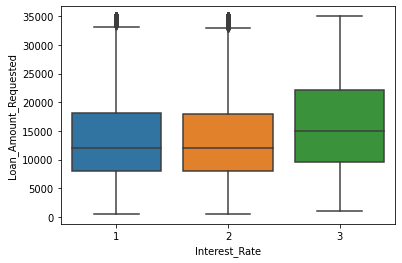

In [31]:
sns.boxplot(y='Loan_Amount_Requested', x = 'Interest_Rate', data = df)

Bisa dilihat bahwa rata-rata untuk interest rate golongan 3 itu lebih tinggi daripada 2 sisanya. Terlihat juga kalau golongan 1 dan 2 terdapat outlier, <b>aritnya ?</b>

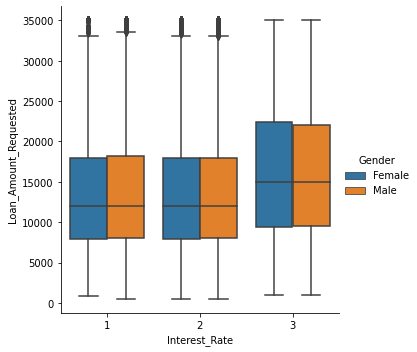

In [32]:
sns.catplot(y='Loan_Amount_Requested', x = 'Interest_Rate', hue = 'Gender', kind='box', data = df)

## Length Employed Vis


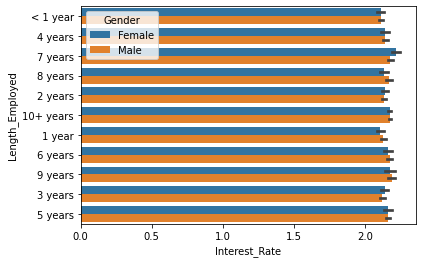

In [33]:
sns.barplot(y='Length_Employed', x = 'Interest_Rate', data = df, hue = 'Gender')

## Home_Owner Vis

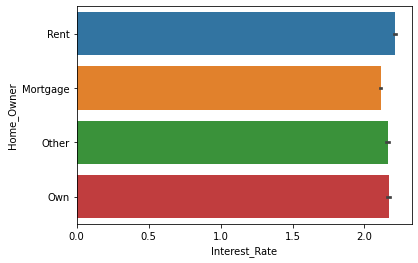

In [34]:
sns.barplot(y = 'Home_Owner', x = 'Interest_Rate', data =df)

In [35]:
df.groupby('Home_Owner').agg({'Interest_Rate':['mean','sum','count']})

Interest_Rate               
                    mean     sum  count
Home_Owner                             
Mortgage        2.112577  142337  67376
Other           2.160624   52380  24243
Own             2.167860   24835  11456
Rent            2.210423  119060  53863

Terlihat untuk rata-ratanya sebenarnya untuk seluruh tipe home_owner tidak ada perbedaan dalam rata-rata_interest rate. namun perlu ditinjuau lebih lanjut pada bagian **mortgage dan Rent jumlahnya jauh lebih banyak dari yang lain**

## Annual Income

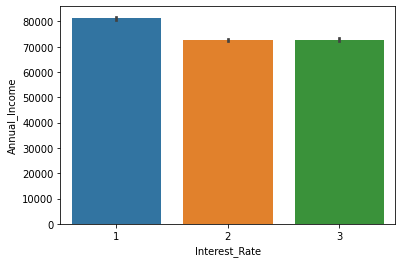

In [36]:
sns.barplot(x='Interest_Rate', y = 'Annual_Income',data = df)

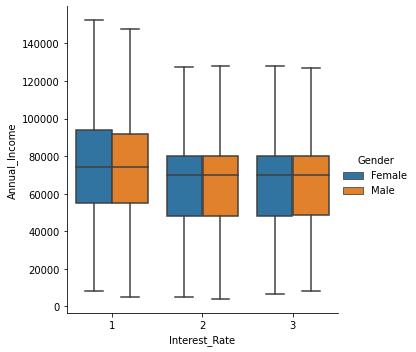

In [37]:
sns.catplot(y='Annual_Income', x = 'Interest_Rate', hue = 'Gender', kind='box', data = df, showfliers = False)

WARNING !!!!
Terdapat banyak sekali outlier pada Annual Income

## Income_Verified

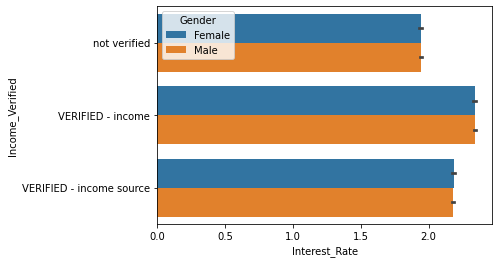

In [38]:
sns.barplot(x='Interest_Rate', y = 'Income_Verified', hue = 'Gender', data = df)

In [39]:
df.groupby('Income_Verified').agg({'Interest_Rate':['mean','sum','count']})

Interest_Rate               
                                  mean     sum  count
Income_Verified                                      
VERIFIED - income             2.339631  125940  53829
VERIFIED - income source      2.179936  112343  51535
not verified                  1.945341  100329  51574

## Purpose_Of_Loan vis

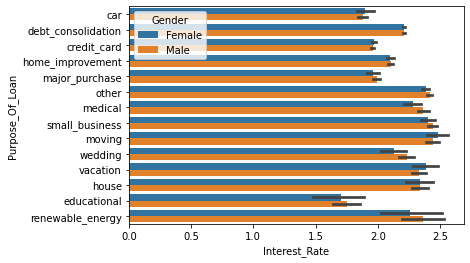

In [40]:
pof = df.groupby(['Purpose_Of_Loan', 'Gender'])['Interest_Rate'].mean().sort_values().to_frame()
pof = pof.reset_index()
pof

sns.barplot(x='Interest_Rate', y = 'Purpose_Of_Loan', hue='Gender', data = df)
# 

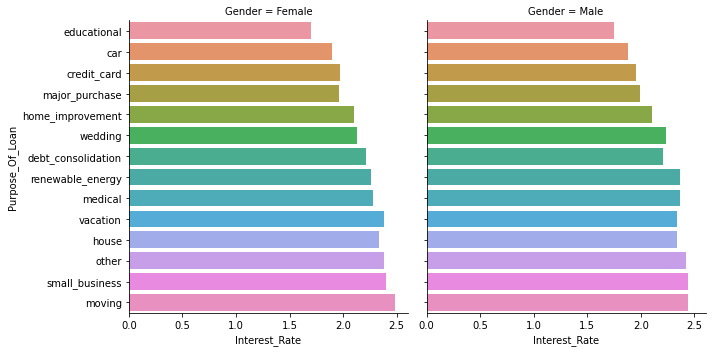

In [41]:
sns.catplot(x='Interest_Rate', y = 'Purpose_Of_Loan', kind='bar',col='Gender', data = pof)

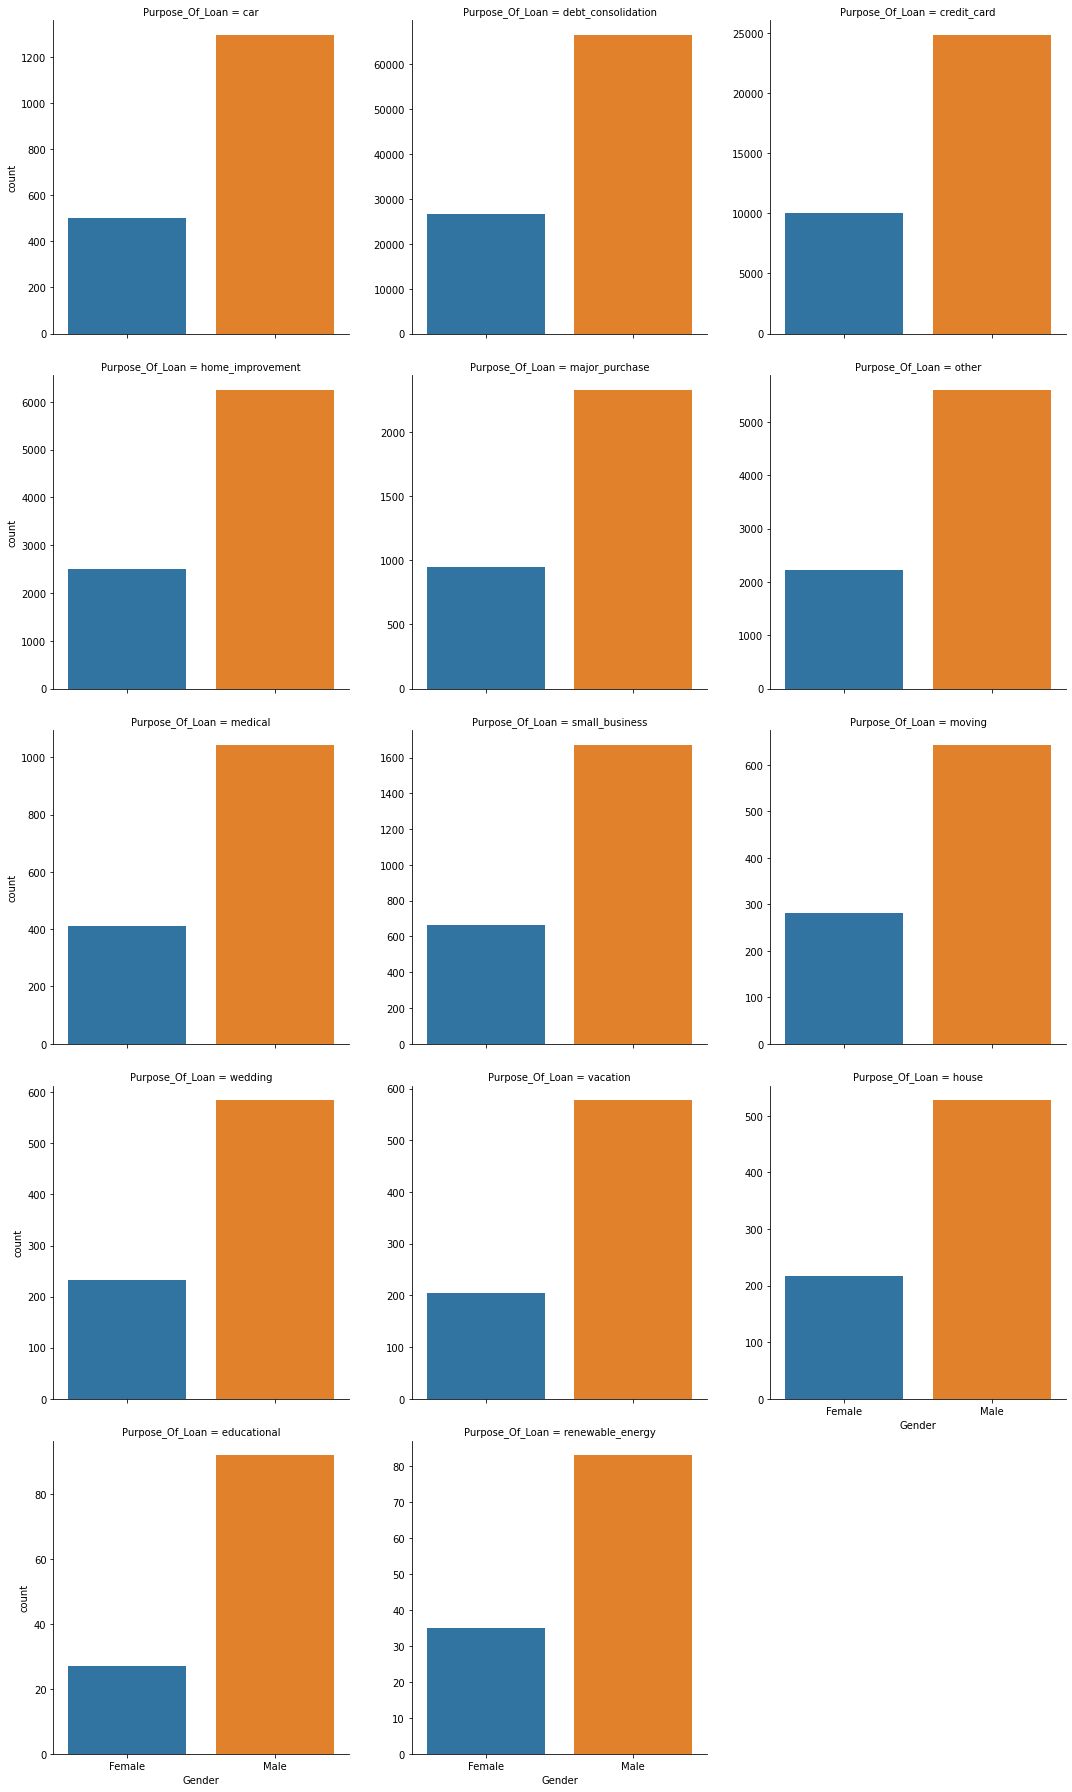

In [42]:
sns.catplot(x = 'Gender', kind='count',col='Purpose_Of_Loan', data = df, col_wrap=3, sharey=False)

In [43]:
df['Gender'].value_counts()

Male      111932
Female     45006
Name: Gender, dtype: int64

## Debt_To_Income vis

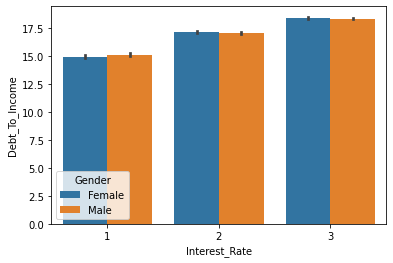

In [44]:
sns.barplot(x='Interest_Rate', y='Debt_To_Income', hue ='Gender', data =df)

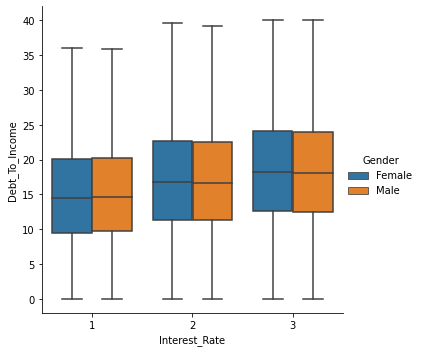

In [45]:
sns.catplot(y='Debt_To_Income', x = 'Interest_Rate', hue = 'Gender', kind='box', data = df, showfliers = False)

Terlihat bahwa semakin tinggi debt to income, maka akan semakin tinggi juga interest_rate nya.

## Inquiries_Last_6Mo Vis

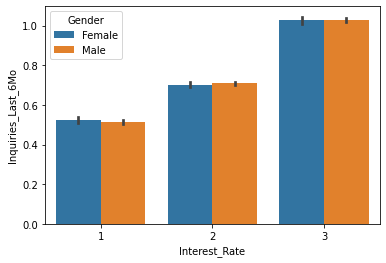

In [46]:

sns.barplot(x='Interest_Rate', y='Inquiries_Last_6Mo', hue ='Gender', data =df)

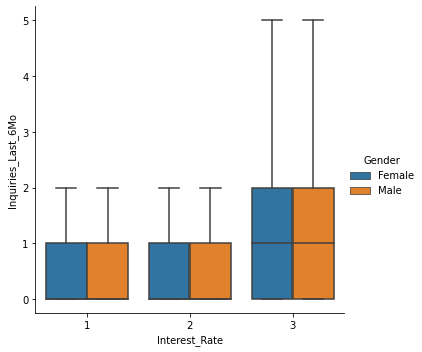

In [47]:
sns.catplot(y='Inquiries_Last_6Mo', x = 'Interest_Rate', hue = 'Gender', kind='box', data = df, showfliers = False)

 Semakin tinggi nilai iquiries atau panggilan dari peminjam 6 bulan terakhir, amaka akans emakin tinggi juga itnerest rate nya

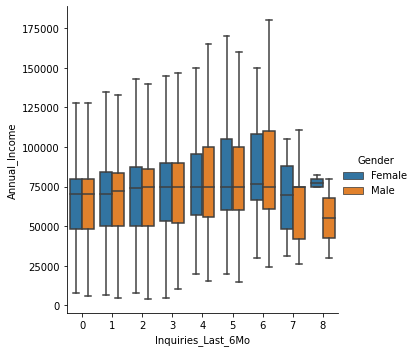

In [48]:
sns.catplot(y='Annual_Income', x = 'Inquiries_Last_6Mo', hue = 'Gender', kind='box', data = df, showfliers = False)

Penemuan menari, makin tinggi nilai panggilan dari peminjam, makin tinggi juga si penghasilan pemohon pinjaman dalam seahun

## Months_Since_Deliquency Vis

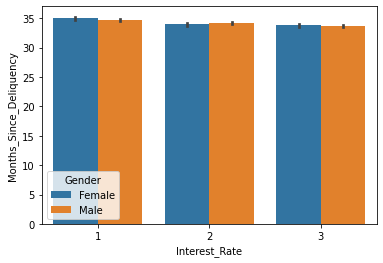

In [49]:

sns.barplot(x='Interest_Rate', y='Months_Since_Deliquency', hue ='Gender', data =df)

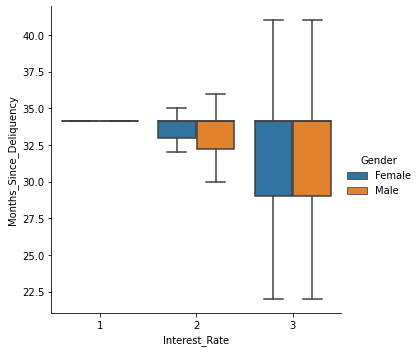

In [50]:
sns.catplot(y='Months_Since_Deliquency', x = 'Interest_Rate', hue = 'Gender', kind='box', data = df, showfliers = False)

Terlihat bahwa semakin tinggi interest rate, maka nilai months since deliquency meningnkat

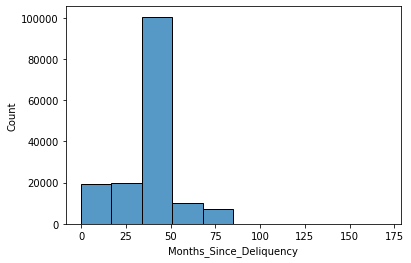

In [51]:
sns.histplot(x='Months_Since_Deliquency', data = df, bins = 10)

## Number_Open_Accounts Vis

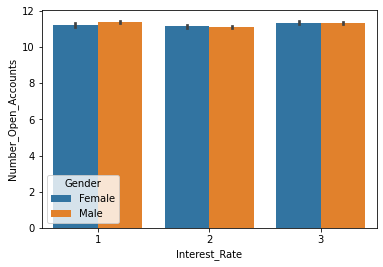

In [52]:

sns.barplot(x='Interest_Rate', y='Number_Open_Accounts', hue ='Gender', data =df) 

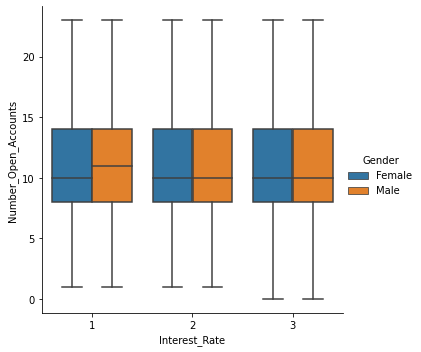

In [53]:
sns.catplot(y='Number_Open_Accounts', x = 'Interest_Rate', hue = 'Gender', kind='box', data = df, showfliers = False)

Number of Open accounts gak ngaruh

## Total Accounts Vis

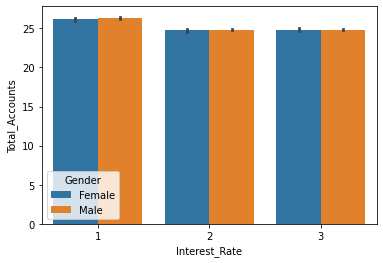

In [54]:

sns.barplot(x='Interest_Rate', y='Total_Accounts', hue ='Gender', data =df)

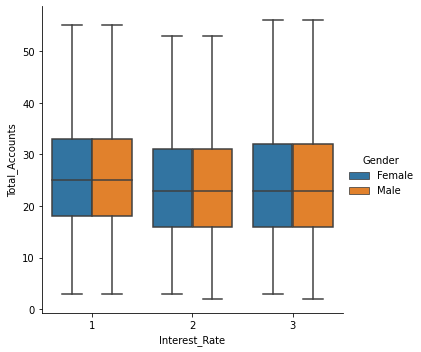

In [55]:
sns.catplot(y='Total_Accounts', x = 'Interest_Rate', hue = 'Gender', kind='box', data = df, showfliers = False)

In [56]:
df.groupby('Total_Accounts').agg({'Interest_Rate':['mean','sum','count']}).sort_values(by=('Interest_Rate','mean'))

Interest_Rate          
                        mean sum count
Total_Accounts                        
86                  1.571429  11     7
67                  1.787879  59    33
77                  1.800000  27    15
72                  1.818182  20    11
97                  2.000000   2     1
...                      ...  ..   ...
2                   2.600000  26    10
102                 3.000000   3     1
98                  3.000000   3     1
99                  3.000000   3     1
156                 3.000000   3     1

[100 rows x 3 columns]

In [57]:
df.groupby('Interest_Rate').agg({'Total_Accounts':['mean','sum','count']})

Total_Accounts                
                        mean      sum  count
Interest_Rate                               
1                  26.272988   851166  32397
2                  24.798511  1671618  67408
3                  24.841020  1419242  57133

## Gender Vis

Gak dibuat karena mau cewe mau cowo hampir sama semua hasilnya di seluruh parameter

## Correlation

In [58]:
df.corr(method='pearson')

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
Loan_ID,1.000000,0.001441,0.007695,-0.001110,0.002184,0.001890,0.004634,0.005477,0.000679
Loan_Amount_Requested,0.001441,1.000000,0.303813,0.060621,-0.008756,-0.028181,0.196834,0.231093,0.137296
Annual_Income,0.007695,0.303813,1.000000,-0.160295,0.054807,-0.040269,0.128585,0.184341,-0.047673
Debt_To_Income,-0.001110,0.060621,-0.160295,1.000000,-0.004836,0.003551,0.306803,0.233659,0.150664
Inquiries_Last_6Mo,0.002184,-0.008756,0.054807,-0.004836,1.000000,0.009613,0.100028,0.130724,0.188345
Months_Since_Deliquency,0.001890,-0.028181,-0.040269,0.003551,0.009613,1.000000,-0.032809,-0.040847,-0.027336
Number_Open_Accounts,0.004634,0.196834,0.128585,0.306803,0.100028,-0.032809,1.000000,0.683670,0.004023
Total_Accounts,0.005477,0.231093,0.184341,0.233659,0.130724,-0.040847,0.683670,1.000000,-0.039646
Interest_Rate,0.000679,0.137296,-0.047673,0.150664,0.188345,-0.027336,0.004023,-0.039646,1.000000


## Semi Conclusion
We can conclude that, these parameters are the ones that will impact the machine learning model:


*   Loan_Amount_Requested
*   Length_Employed
*   Annual_Income
*   Income_Verified
*   Purpose_Loan
*   Debt_To_Income
*   Inquiries_Last_6Mo
*   Months_Since_Deliquency




note: Harus diuji lagi secara statistika seperti p values dll nya untuk menguji hubungan antara dependent dan dependet parameters


# Machine Learning

## Data Preparation

In [92]:
df_final = df[['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',\
              'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', \
              'Inquiries_Last_6Mo', 'Months_Since_Deliquency']]

In [93]:
X = pd.get_dummies(df_final)
y = np.ravel(df[['Interest_Rate']])

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ss = StandardScaler()
X = ss.fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




In [62]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [63]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# # Instanciate vectorizer
# vectorizer = TfidfVectorizer()
# # Train vectorizer
# X_train = vectorizer.fit_transform(X_train)
# # Apply vectorizer to test data
# X_test = vectorizer.transform(X_test)

## Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
grid_search = GridSearchCV(lr, parameters, cv=10)
logreg_cv = grid_search.fit(X_train, y_train)
print('Done!')

Done!


In [102]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.5111339137045113


In [104]:
LogReg_score = logreg_cv.score(X_test,y_test)
LogReg_score

0.5102586975914363

## SVM

In [106]:
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [108]:
grid_object = GridSearchCV(svm, parameters, cv=10)
svm_cv = grid_object.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

In [70]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [83]:
cols = X_train.columns.to_list()

In [77]:
shap_values

[array([[-0.25677557,  0.00356936, -0.00732144, ..., -0.        ,
         -0.        , -0.        ],
        [ 0.27901597, -0.02244598,  0.0077108 , ..., -0.        ,
         -0.        , -0.        ],
        [ 0.2689067 , -0.18142865, -0.01259504, ..., -0.        ,
         -0.        , -0.        ],
        ...,
        [-0.47244009,  0.00645996,  0.00726722, ..., -0.        ,
         -0.        , -0.        ],
        [ 0.12063734, -0.14269695, -0.02299439, ..., -0.        ,
         -0.        , -0.        ],
        [-0.52703017,  0.01657703, -0.04477881, ..., -0.        ,
         -0.        , -0.        ]]),
 array([[-0.08054561,  0.00147097,  0.00585036, ..., -0.        ,
         -0.        , -0.        ],
        [ 0.087522  , -0.00925022, -0.00616149, ..., -0.        ,
         -0.        , -0.        ],
        [ 0.08435092, -0.07476861,  0.01006435, ..., -0.        ,
         -0.        , -0.        ],
        ...,
        [-0.14819547,  0.00266221, -0.00580704, ..., -

In [86]:
shap.plots.waterfall(explainer.expected_value + sum(shap_values))

ValueError: ignored

In [73]:
shap.plots.bar(shap_values)

AssertionError: ignored

In [68]:
X_test_array = np.array(X_test)
shap.summary_plot(shap_values,
                  X_test_array,
                  feature_names=vectorizer.get_feature_names())

NameError: ignored

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# Fits the model on the data
# model.fit(X_train, y_train)

In [ ]:
# import shap
# # Fits the explainer
# explainer = shap.Explainer(model.predict, X_test)
# # Calculates the SHAP values - It takes some time
# shap_values = explainer(X_test)

In [ ]:
# Evaluate SHAP values
# shap_values = explainer.s?hap_values(X)

In [ ]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [ ]:
# shap.plots.bar(shap_values)